# 学习率：

学习速率(learning rate)是指导我们该如何通过损失函数的梯度调整网络权重的超参数。学习率越低，损失函数的变化速度就越慢。虽然使用低学习率可以确保我们不会错过任何局部极小值，但也意味着我们将花费更长的时间来进行收敛，特别是在被困在高原区域的情况下。

### new_weight = existing_weight — learning_rate * gradient

![title](img_src/1.png)

图1采用较小的学习率，梯度下降的速度慢；
图2采用较大的学习率，梯度下降太快越过了最小值点，导致不收敛，甚至震荡。

![tittle](./img_src/2.png)

实验/测试
pytorch中相关的API

关于学习率调整，pytorch提供了torch.optim.lr_scheduler

主要提供了几个类：

    torch.optim.lr_scheduler.LambdaLr
    torch.optim.lr_scheduler.StepLR
    torch.optim.lr_scheduler.MultiStepLR
    torch.optim.lr_scheduler.ExponentialLR
    torch.optim.lr_sheduler.CosineAnneaingLR
    torch.optim.lr_scheduler.ReduceLROnPlateau


## 1. torch.optim.lr_scheduler.StepLR:
CLASS torch.optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1, last_epoch=-1)

每个step_size时间步长后使每个参数组的学习率降低。注意，这种衰减可以与此调度程序外部对学习率的其他更改同时发生。当last_epoch=-1时，将初始lr设置为lr。

参数：

    optimizer (Optimizer) – 封装的优化器

    step_size (int) – 学习率衰减的周期

    gamma (float) – 学习率衰减的乘数因子。Default: 0.1.

    last_epoch (int) – 最后一个迭代epoch的索引. Default: -1.


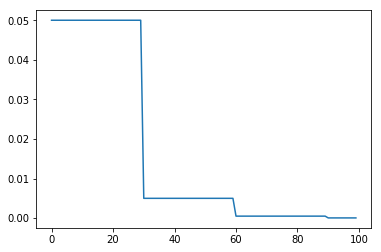

In [9]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision.models import AlexNet
import matplotlib.pyplot as plt


model = AlexNet(num_classes=2)
optimizer = optim.SGD(params=model.parameters(), lr=0.05)

# lr_scheduler.StepLR()
# Assuming optimizer uses lr = 0.05 for all groups
# lr = 0.05     if epoch < 30
# lr = 0.005    if 30 <= epoch < 60
# lr = 0.0005   if 60 <= epoch < 90

scheduler = lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    scheduler.step()
    lr = scheduler.get_lr()
    # print(epoch, scheduler.get_lr()[0])
    y.append(scheduler.get_lr()[0])

plt.plot(x, y)
plt.show()

## 2.torch.optim.lr_scheduler.ExponentialLR
CLASS torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma, last_epoch=-1)
每个epoch都对每个参数组的学习率进行衰减。当last_epoch=-1时，将初始lr设置为lr。

参数：

    optimizer (Optimizer) – 封装的优化器

    gamma (float) – 学习率衰减的乘数因子

    last_epoch (int) – 最后一个迭代epoch的索引. Default: -1.

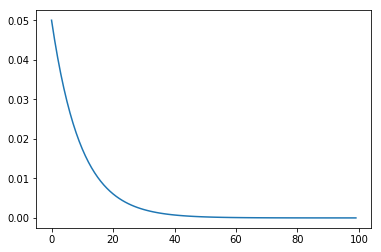

In [11]:
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
print()
plt.figure()
y.clear()
for epoch in range(100):
    scheduler.step()
#     print(epoch, 'lr={:.6f}'.format(scheduler.get_lr()[0]))
    y.append(scheduler.get_lr()[0])

plt.plot(x, y)
plt.show()

## 3.torch.optim.lr_scheduler.LambdaLr
CLASS torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda, last_epoch=-1)

将每个参数组的学习率设置为初始lr乘以给定函数。当last_epoch=-1时，将初始lr设置为lr。

参数：

    optimizer (Optimizer) – 封装好的优化器

    lr_lambda (function or list) –当是一个函数时,需要给其一个整数参数,使其计算出一个乘数因子,用于调整学习率,通常该输入参数是epoch数目；或此类函数的列表，根据在optimator.param_groups中的每组的长度决定lr_lambda的函数个数，如下报错。

    last_epoch (int) – 最后一个迭代epoch的索引. Default: -1.


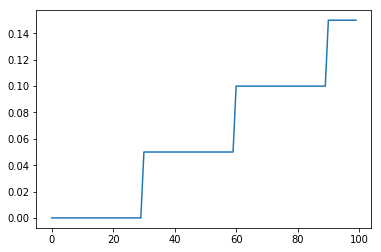

In [20]:
lambda1 = lambda epoch:epoch // 30
lambda2 = lambda epoch:0.95**epoch
scheduler = lr_scheduler.LambdaLR(optimizer,lr_lambda=lambda1)
print()
plt.figure()
y.clear()
for epoch in range(100):
    scheduler.step()
#     print(epoch, 'lr={:.6f}'.format(scheduler.get_lr()[0]))
    y.append(scheduler.get_lr()[0])

plt.plot(x, y)
plt.show()

## 4.torch.optim.lr_scheduler.MultiStepLR

CLASS torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones, gamma=0.1, last_epoch=-1)

当迭代数epoch达到某个里程碑时，每个参数组的学习率将被gamma衰减。注意，这种衰减可以与此调度程序外部对学习率的其他更改同时发生。当last_epoch=-1时，将初始lr设置为lr。

参数：

    optimizer (Optimizer) – 封装的优化器

    milestones (list) –迭代epochs指数列表. 列表中的值必须是增长的.

    gamma (float) – 学习率衰减的乘数因子。Default: 0.1.

    last_epoch (int) – 最后一个迭代epoch的索引. Default: -1.

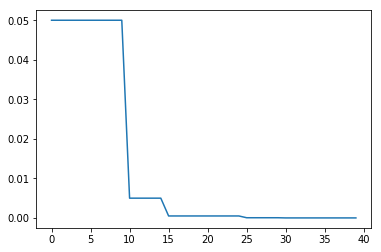

In [26]:
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[10,15,25,30], gamma=0.1)
plt.figure()
x = list(range(40))
y = []

for epoch in range(40):
    scheduler.step()
    lr = scheduler.get_lr()
#     print(epoch, scheduler.get_lr()[0])
    y.append(scheduler.get_lr()[0])

plt.plot(x,y)
plt.show()# 默认LR为0.05

## 5.CosineAnnealingLR

CLASS torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max, eta_min=0, last_epoch=-1)

使用余弦退火调度设置各参数组的学习率，其中ηmax设为初始lr, Tcur为SGDR上次重启后的时间间隔个数:

![tittle](img_src/3.png)

当last_epoch=-1时，将初始lr设置为lr。注意，由于调度是递归定义的，所以其他操作符可以在此调度程序之外同时修改学习率。如果学习速率仅由该调度程序设置。利用cos曲线降低学习率,该方法来源SGDR,学习率变换如下公式:

![tittle](img_src/4.png)

该方法已在SGDR中提出SGDR: Stochastic Gradient Descent with Warm Restarts。注意，这只实现了SGDR的余弦退火部分，而没有重新启动。

参数：

    optimizer (Optimizer) – 封装的优化器

    T_max (int) – 迭代的最大数量

    eta_min (float) – 最小学习率 Default: 0.

    last_epoch (int) – 最后一个迭代epoch的索引. Default: -1.

0 0.05
1 0.025
2 0.0
3 0.024999999999999994
4 0.05
5 0.02500000000000001
6 0.0
7 0.02499999999999999
8 0.05
9 0.025000000000000012


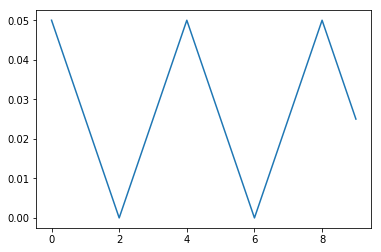

In [27]:
#根据式子进行计算
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=2)

plt.figure()
x = list(range(10))
y = []

for epoch in range(10):
    scheduler.step()
    lr = scheduler.get_lr()
    print(epoch, scheduler.get_lr()[0])
    y.append(scheduler.get_lr()[0])

plt.plot(x,y)

## 6.ReduceLROnPlateau(动态衰减lr)

CLASS torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

torch.optim.lr_scheduler.ReduceLROnPlateau允许基于一些验证测量对学习率进行动态的下降

当评价指标停止改进时，降低学习率。一旦学习停滞不前，模型通常会从将学习率降低2-10倍中获益。这个调度器读取一个度量量，如果在“patience”时间内没有看到改进，那么学习率就会降低。

参数：

    optimizer (Optimizer) – 封装的优化器

    mode (str) – min, max两个模式中一个。在min模式下，当监测的数量停止下降时，lr会减少;在max模式下，当监视的数量停止增加时，它将减少。默认值:“分钟”。

    factor (float) – 学习率衰减的乘数因子。new_lr = lr * factor. Default: 0.1.

    patience (int) – 没有改善的迭代epoch数量，这之后学习率会降低。例如，如果patience = 2，那么我们将忽略前2个没有改善的epoch，如果loss仍然没有改善，那么我们只会在第3个epoch之后降低LR。Default:10。

    verbose (bool) – 如果为真，则为每次更新打印一条消息到stdout. Default: False.

    threshold (float) – 阈值，为衡量新的最优值，只关注显著变化. Default: 1e-4.

    threshold_mode (str) – rel, abs两个模式中一个. 在rel模式的“max”模式下的计算公式为dynamic_threshold = best * (1 + threshold)，或在“min”模式下的公式为best * (1 - threshold)。在abs模式下的“max”模式下的计算公式为dynamic_threshold = best + threshold，在“min”模式下的公式为的best - threshold. Default: ‘rel’.

    cooldown (int) – 减少lr后恢复正常操作前等待的时间间隔. Default: 0.

    min_lr (float or list) – 标量或标量列表。所有参数组或每组的学习率的下界. Default: 0.

    eps (float) – 作用于lr的最小衰减。如果新旧lr之间的差异小于eps，则忽略更新. Default: 1e-8.
# 第一个loss为0.7329，一直向后的patient=10的10个epoch中都没有loss小于它，所以根据mode='min'，lr = lr*factor=lr * 0.1,所以lr从10变为了1.0

In [28]:
import torchvision.models as models
import torch.nn as nn
model = models.resnet34(pretrained=True)
fc_features = model.fc.in_features
model.fc = nn.Linear(fc_features, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params = model.parameters(), lr=10)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
inputs = torch.randn(4,3,224,224)
labels = torch.LongTensor([1,1,0,1])
plt.figure()
x = list(range(60))
y = []

for epoch in range(60):
    optimizer.zero_grad()
    outputs = model(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()
    scheduler.step(loss) 
    optimizer.step()
    
    lr = optimizer.param_groups[0]['lr']
    print(epoch, lr)
    y.append(lr)

plt.plot(x,y)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/kenny/.torch/models/resnet34-333f7ec4.pth
9396224it [11:18, 13858.60it/s] 


KeyboardInterrupt: 